# Classificação de Dígitos com Keras e o Dataset MNIST


# 1. Carregamento e Análise dos Dados

O **dataset MNIST**, é um dos conjuntos de dados mais clássicos utilizados em aprendizado de máquina e visão computacional.

O **MNIST** contém imagens de **dígitos manuscritos (0 a 9)**, em **escala de cinza**, com **resolução de 28x28 pixels**.

Ele é amplamente usado como ponto de partida para testar e entender modelos de **redes neurais artificiais**,
principalmente **redes neurais convolucionais (CNNs)**.

## Características do Dataset MNIST

O dataset MNIST é composto por:

*   **Amostras**: 60.000 imagens para treino e 10.000 imagens para teste.
*   **Organização**: Cada amostra é uma imagem em formato de array NumPy.
*   **Dimensões**: As imagens têm **28x28 pixels**.
*   **Escala de Cinza**: As imagens são em **escala de cinza**, o que significa que cada pixel tem um valor entre 0 (preto) e 255 (branco), representando a intensidade do pixel. Não há canais de cor (RGB).
*   **Número de Classes**: Existem **10 classes**, representando os dígitos de 0 a 9.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [ ]:
# Carregar os dados do MNIST diretamente do Keras
(x_treinamento, y_treinamento), (x_teste, y_teste) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Exibir o formato dos conjuntos
print("Formato de x_treinamento:", x_treinamento.shape)
print("Formato de y_treinamento:", y_treinamento.shape)
print("Formato de x_teste:", x_teste.shape)
print("Formato de y_teste:", y_teste.shape)

Formato de x_treinamento: (60000, 28, 28)
Formato de y_treinamento: (60000,)
Formato de x_teste: (10000, 28, 28)
Formato de y_teste: (10000,)


**Formato de x_treinamento: (60000, 28, 28):**

* **60000:** Este é o número total de amostras ou imagens no  conjunto de treinamento. Ou seja, há 60.000 imagens que o modelo usará para aprender.
* **28:** Este é o número de pixels na altura de cada imagem.
* **28:** Este é o número de pixels na largura de cada imagem.

Então, (60000, 28, 28) significa que o dataset tem 60.000 imagens, e cada uma delas é uma grade de 28x28 pixels.


**Formato de y_treinamento: (60000,):**

* **60000:** Este é o número total de rótulos ou classes correspondentes às 60.000 imagens do conjunto de treinamento.
* **,:** A vírgula solitária indica que é um array unidimensional, ou seja, uma lista simples de rótulos. Cada rótulo é um número (de 0 a 9) que identifica o dígito presente na imagem correspondente.

Os mesmos princípios se aplicam aos conjuntos de teste (x_teste e y_teste), apenas com um número diferente de amostras (10.000, neste caso).

## Estrutura dos Dados

Cada imagem no `x_treinamento` e `x_teste` é uma **matriz 28x28**, representando os pixels da imagem.

O vetor `y_treinamento` contém o **rótulo numérico (0 a 9)** de cada imagem.

Abaixo iremos visualizar algumas imagens do conjunto de treinamento para entender como elas são representadas.


No codigo abaixo, o **(2,5,i+1)** significa que estamos organizando os sub-gráficos em uma grade de **2 linhas por 5 colunas**, e **i+1** indica a posição atual do sub-gráfico na grade (começando do 1).

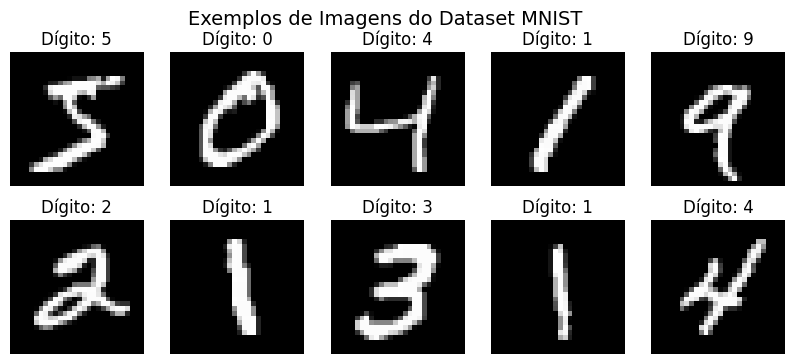

In [ ]:
# Plotar 10 imagens do conjunto de treinamento
plt.figure(figsize=(10,4)) #10 polegadas de largura por 4 polegadas de altura

for i in range(10):
  #cria um 'sub-gráfico' dentro da figura principal.
    plt.subplot(2,5,i+1)
    plt.imshow(x_treinamento[i], cmap='gray')
    plt.title(f"Dígito: {y_treinamento[i]}")
    plt.axis('off')

plt.suptitle("Exemplos de Imagens do Dataset MNIST", fontsize=14)
plt.show()

# 2. Preparação dos Dados

Antes de treinar nossa Rede Neural Convolucional (CNN), precisamos preparar o dataset MNIST de forma que ele possa ser utilizado corretamente pelo modelo.

O processo de **pré-processamento dos dados** é essencial em qualquer aplicação de aprendizado profundo, pois garante que os dados estejam no formato e na escala adequados para o treinamento.

Nesta etapa, realizaremos as seguintes operações:

1. **Normalização dos valores dos pixels:** transformar valores de 0–255 para o intervalo [0, 1];
2. **Transformação das imagens:** adicionar o canal de cor (necessário para CNNs);
3. **Codificação dos rótulos (labels):** converter os números inteiros (0 a 9) para vetores "one-hot";
4. **Divisão entre dados de treinamento e teste:**  garantir conjuntos separados para treinar e avaliar o modelo.

Essas etapas garantem que a rede neural consiga **aprender de forma eficiente e generalizar bem** para novos exemplos.


## Pré-processamento Inicial dos Dados

Antes de treinar uma rede neural, é comum **normalizar os valores dos pixels** para o intervalo **[0, 1]**.

Isso melhora a eficiência do treinamento e ajuda a rede a convergir mais rapidamente, pois reduz variações numéricas grandes entre os dados de entrada.


###Normalização dos valores de pixels

In [ ]:
# Converter os valores de 0–255 para o intervalo 0–1
x_treinamento = x_treinamento.astype('float32') / 255.0
x_teste = x_teste.astype('float32') / 255.0

In [ ]:
# Verificar o novo intervalo de valores
print("Valor mínimo em x_treinamento:", x_treinamento.min())
print("Valor máximo em x_treinamento:", x_treinamento.max())


Valor mínimo em x_treinamento: 0.0
Valor máximo em x_treinamento: 1.0


###Transformação das imagens


As Redes Neurais Convolucionais (CNNs) esperam que as imagens possuam **4 dimensões** de entrada:

`(n_amostras, altura, largura, canais)`

No dataset MNIST:
- `altura = 28`
- `largura = 28`
- `canais = 1` (porque as imagens são em escala de cinza)

Vamos adicionar essa quarta dimensão (canal de cor) às imagens.

A função `np.expand_dims()` expande a forma de um array inserindo um novo eixo (dimensão) em uma posição específica. O `axis=-1` significa que a nova dimensão será adicionada no final da forma do array. Assim, um array de forma `(N, H, W)` se torna `(N, H, W, 1).`

In [ ]:
# Adicionar o canal de cor (1) ao final da dimensão
x_treinamento = np.expand_dims(x_treinamento, axis=-1)
x_teste = np.expand_dims(x_teste, axis=-1)

In [ ]:
# Exibir o novo formato
print("Novo formato de x_treinamento:", x_treinamento.shape)
print("Novo formato de x_teste:", x_teste.shape)

Novo formato de x_treinamento: (60000, 28, 28, 1)
Novo formato de x_teste: (10000, 28, 28, 1)


Agora, cada imagem de treinamento tem o formato (28, 28, 1), e o conjunto completo tem dimensão (60000, 28, 28, 1).

### Transformação dos Rótulos (Labels)

Os rótulos originais (`y_treinamento` e `y_teste`) são valores inteiros entre 0 e 9.

Para treinar uma rede neural em uma **tarefa de classificação multiclasse**, é necessário converter esses rótulos para o formato **one-hot encoding**.

Essa técnica transforma cada rótulo em um vetor binário com 10 posições (uma para cada classe).  

**Exemplo:**

| Rótulo original | Vetor One-Hot |
|-----------------|---------------|
| 0 | [1,0,0,0,0,0,0,0,0,0] |
| 3 | [0,0,0,1,0,0,0,0,0,0] |
| 9 | [0,0,0,0,0,0,0,0,0,1] |


Isso facilita a comparação entre as previsões da rede (saídas em probabilidade) e os rótulos corretos.


In [ ]:
from tensorflow.keras.utils import to_categorical

A função `to_categorical` é usada para transformar rótulos inteiros de classes **(como 0, 1, 2, ..., 9)** em um formato chamado **one-hot encoding**. Este formato é um **vetor binário** onde apenas uma posição é `'1' (indicando a classe correta) e todas as outras são '0'`

In [ ]:
# Converter os rótulos (0–9) para vetores "one-hot"
y_treinamento_cat = to_categorical(y_treinamento, 10)
y_teste_cat = to_categorical(y_teste, 10)

In [ ]:
# Exibir exemplo
print("Rótulo original:", y_treinamento[0])
print("Rótulo one-hot codificado:", y_treinamento_cat[0])

Rótulo original: 5
Rótulo one-hot codificado: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Divisão entre Dados de Treinamento e Teste

O dataset MNIST já vem dividido em dois subconjuntos:

- **Treinamento (x_treinamento, y_treinamento):**  60.000 imagens e rótulos usados para o aprendizado do modelo.
- **Teste (x_teste, y_teste):**  10.000 imagens e rótulos usados para avaliar o desempenho do modelo após o treinamento.

Isso garante que o modelo seja avaliado com **dados nunca vistos antes**, o que mede sua capacidade de **generalização**.


In [ ]:
print("Resumo final dos conjuntos de dados:")
print(f"Conjunto de Treinamento: {x_treinamento.shape[0]} imagens")
print(f"Conjunto de Teste: {x_teste.shape[0]} imagens")
print(f"Dimensão das imagens: {x_treinamento.shape[1:]} (Altura, Largura, Canais)")
print(f"Número de classes: {y_treinamento_cat.shape[1]}")

Resumo final dos conjuntos de dados:
Conjunto de Treinamento: 60000 imagens
Conjunto de Teste: 10000 imagens
Dimensão das imagens: (28, 28, 1) (Altura, Largura, Canais)
Número de classes: 10


## 3. Construção do Modelo com Keras

Vamos construir uma Rede Neural Totalmente Conectada (MLP - Multilayer Perceptron) usando a API Sequencial do Keras. Este modelo será projetado para classificar as 10 classes de dígitos (0 a 9).

### Estrutura do Modelo (MLP):
- **Camada de Entrada:** Recebe a imagem (28x28 pixels = 784 entradas)
- **Camada Oculta:** Contém neurônios densamente conectados, responsáveis por aprender padrões
- **Camada de Saída:** 10 neurônios (um para cada classe de dígito)


In [ ]:
# Importação das bibliotecas necessárias
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

### Definição da Arquitetura do Modelo

Uma MLP não pode receber diretamente imagens 2D (28x28 pixels). Por isso, a primeira camada será uma camada `Flatten` para transformar a imagem 2D em um vetor 1D (28 * 28 = 784 pixels). Em seguida, adicionaremos camadas `Dense` (totalmente conectadas).

 modelo **MLP (Multilayer Perceptron)** será definido da seguinte forma:

1. **Camada Flatten:** "achata" a imagem 28x28 em um vetor de 784 posições.
   - **Exemplo:** uma imagem 28x28 passa a ser representada como `[784 valores]`.
2. **Camada Oculta:** uma camada densa (fully connected) com **128 neurônios** e função de ativação **ReLU**.
   - A função `ReLU` (Rectified Linear Unit) é amplamente usada porque acelera o aprendizado e evita saturação.
3. **Camada de Saída:** com **10 neurônios** e ativação **Softmax**.
   - A função `Softmax` converte os resultados em **probabilidades** para cada uma das 10 classes.

In [ ]:
model = Sequential([
    # A camada Flatten transforma a imagem 28x28x1 em um vetor 1D de 784 elementos
    Flatten(input_shape=(28, 28, 1)),

    # Primeira camada oculta Dense com 128 neurônios e ativação ReLU
    Dense(128, activation='relu'),

    # Segunda camada oculta Dense com 64 neurônios e ativação ReLU (opcional, para mais complexidade)
    Dense(64, activation='relu'),

    # Camada de saída Dense com 10 neurônios (um para cada classe de 0 a 9)
    # A ativação 'softmax' garante que a saída seja uma distribuição de probabilidade
    Dense(10, activation='softmax')
])

# Exibir um resumo do modelo para ver a arquitetura e o número de parâmetros
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

* **Flatten** converte a matriz 28×28 em um vetor linear.

* **Dense(128, activation='relu')** é a camada oculta.

* **Dense(10, activation='softmax')** é a camada de saída, onde cada neurônio representa um dígito (0–9).

### Compilação do Modelo

Após definir a arquitetura, o modelo precisa ser 'compilado'. Essa etapa configura como o modelo vai aprender durante o treinamento.

*   **`optimizer`**: O algoritmo que ajustará os pesos da rede (e.g., 'adam' é uma escolha comum e eficiente).
*   **`loss`**: A função de perda que o modelo tentará minimizar (e.g., 'categorical_crossentropy' é apropriada para classificação multiclasse com rótulos one-hot).
*   **`metrics`**: As métricas para avaliar o desempenho do modelo (e.g., 'accuracy' para a precisão da classificação).

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print("✅ Modelo compilado com sucesso!")

✅ Modelo compilado com sucesso!


# 4. Treinamento e Avaliação do Modelo

### Processo de Treinamento

Nesta etapa, o modelo será 'alimentado' com os dados de treinamento para aprender a classificar os dígitos. O processo envolve:

*   **`x_treinamento` e `y_treinamento_cat`**: Os dados de entrada (imagens) e os rótulos correspondentes (one-hot encoded) que o modelo usará para aprender.
*   **`epochs`**: O número de vezes que o algoritmo de treinamento trabalhará em todo o conjunto de dados de treinamento. Cada época significa que o modelo viu e processou todas as amostras de treinamento uma vez. Um número maior de épocas pode levar a um melhor ajuste, mas também pode causar *overfitting*.
*   **`batch_size`**: O número de amostras que serão propagadas através da rede neural antes que os parâmetros do modelo sejam atualizados. Um tamanho de *batch* menor pode levar a um treinamento mais ruidoso, mas com uma generalização potencialmente melhor.
*   **`validation_data`**: Usaremos `(x_teste, y_teste_cat)` como dados de validação. Isso permite monitorar o desempenho do modelo em dados não vistos durante o treinamento, ajudando a identificar o *overfitting*.
*   **`optimizer`**: 'adam' (Adam Optimizer), que é um algoritmo de otimização adaptativo e eficiente para treinamento de redes neurais.
*   **`loss`**: 'categorical_crossentropy', adequada para problemas de classificação multi-classe onde os rótulos são one-hot encoded.
*   **`metrics`**: 'accuracy' (acurácia), para medir a proporção de previsões corretas.

`history = model.fit(...):` Esta é a função fit do modelo Keras, que é responsável por treinar a rede neural. Ela ajusta os pesos e vieses do modelo com base nos dados fornecidos. A variável history armazenará um objeto History que contém os resultados do treinamento (como a perda e a acurácia para cada época, tanto no conjunto de treinamento quanto no de validação).

**Parâmetros do model.fit:**

* `x_treinamento:` São os dados de entrada para o treinamento, ou seja, as imagens (neste caso, as 60.000 imagens de 28x28x1 pixels já normalizadas e com a dimensão do canal).

* `y_treinamento_cat:` São os rótulos correspondentes às imagens de x_treinamento, mas no formato one-hot encoded (o formato categórico com 10 posições que preparamos anteriormente).

* `epochs=10:` Este é o número de 'épocas' (epochs). Uma época representa uma única passagem completa por todo o conjunto de dados de treinamento. Ou seja, o modelo verá as 60.000 imagens 10 vezes durante o treinamento. Mais épocas podem levar a um melhor aprendizado, mas também podem causar overfitting (onde o modelo memoriza os dados de treinamento e perde a capacidade de generalizar para novos dados).

* `batch_size=32:` Define o 'tamanho do lote' (batch size). Em vez de atualizar os pesos do modelo depois de cada uma das 60.000 imagens (o que seria muito lento e ruidoso), o modelo processa as imagens em grupos de 32. Após cada grupo de 32 imagens, os pesos do modelo são atualizados. Isso equilibra a estabilidade do gradiente e a velocidade de treinamento.

* `validation_data=(x_teste, y_teste_cat):` Este é um parâmetro crucial para monitorar o desempenho do modelo em dados que ele nunca viu durante o treinamento de fato. x_teste e y_teste_cat são os conjuntos de teste. Durante cada época, após o modelo ser treinado no x_treinamento, ele é avaliado neste conjunto de validação. Isso nos ajuda a identificar se o modelo está tendo um bom desempenho em dados novos e a detectar sinais de overfitting (se a acurácia de treinamento continuar subindo, mas a de validação começar a cair).

In [ ]:
print('Iniciando o treinamento do modelo...')
history = model.fit(x_treinamento, y_treinamento_cat,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_teste, y_teste_cat))
print('Treinamento concluído!')

Iniciando o treinamento do modelo...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8802 - loss: 0.4211 - val_accuracy: 0.9640 - val_loss: 0.1151
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9663 - loss: 0.1098 - val_accuracy: 0.9700 - val_loss: 0.0970
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9785 - loss: 0.0699 - val_accuracy: 0.9733 - val_loss: 0.0830
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9835 - loss: 0.0519 - val_accuracy: 0.9754 - val_loss: 0.0818
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9868 - loss: 0.0420 - val_accuracy: 0.9761 - val_loss: 0.0795
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9902 - loss: 0.0312 - val_accuracy: 0.9770 - val_loss: 0.0764
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9922 - loss: 0.0242 - val_accuracy: 0.9792 - val_loss: 0.0735
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/st

**Análise dos resultados:**

**1. Acurácia em Crescimento (Treinamento e Validação):**

* Tanto a `accuracy` quanto a `val_accuracy` começam baixas e
aumentam significativamente ao longo das épocas. Isso indica que o modelo está aprendendo e melhorando sua capacidade de classificar os dígitos.
* A `accuracy` de treinamento atinge um valor muito alto (**0.9944 na Época 10**), o que é excelente para os dados que o modelo viu.
* A `val_accuracy` também é muito boa, atingindo picos de **0.9774**. Isso sugere que o modelo generaliza bem para dados novos.

**2. Perda em Decréscimo (Treinamento e Validação):**

* A `loss` e a `val_loss` diminuem consistentemente nas primeiras épocas, o que é um bom sinal de aprendizado.

**3. Sinais de Overfitting Leve (a partir da Época 5-6):**

* Note que, a partir da Época 5 ou 6, a `accuracy de treinamento` continua a subir **(0.9876 -> 0.9944)**, enquanto a `val_accuracy` tende a estabilizar ou até cair ligeiramente nas últimas épocas **(0.9760 -> 0.9733)**.
* Da mesma forma, a `loss de treinamento` continua a diminuir **(0.0408 -> 0.0164)**, mas a `val_loss` começa a subir em algumas épocas (por exemplo, de 0.0738 na Época 4 para 0.0817 na Época 5 e 0.1060 na Época 10).
* Essa divergência, onde o modelo continua melhorando no conjunto de treinamento mas não no conjunto de validação, é um sinal clássico de overfitting (sobreajuste). O modelo começa a memorizar os detalhes específicos dos dados de treinamento em vez de aprender padrões mais gerais.

### Avaliação do Modelo

Após o treinamento, avaliaremos o desempenho final do modelo no conjunto de dados de teste, que ele nunca viu antes, para medir sua capacidade de generalização.

In [ ]:
print('\nAvaliando o modelo no conjunto de teste...')
loss, accuracy = model.evaluate(x_teste, y_teste_cat)
print(f'Perda (Loss) no conjunto de teste: {loss:.4f}')
print(f'Acurácia (Accuracy) no conjunto de teste: {accuracy:.4f}')


Avaliando o modelo no conjunto de teste...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9730 - loss: 0.1215
Perda (Loss) no conjunto de teste: 0.1053
Acurácia (Accuracy) no conjunto de teste: 0.9766


**Perda (Loss) no conjunto de teste: 0.1060**

* Este é o valor final da função de perda (erro) do modelo no conjunto de teste completo. Uma perda de `0.1060` é um valor baixo, indicando que o modelo cometeu poucos erros e suas previsões foram, em média, muito próximas dos rótulos reais neste conjunto de dados não vistos.

**Acurácia (Accuracy) no conjunto de teste: 0.9733**

Esta é a acurácia final do modelo no conjunto de teste completo. Uma acurácia de `0.9733` (ou 97.33%) significa que o modelo `classificou corretamente mais de 97% das imagens de dígitos manuscritos no conjunto de teste.`

Este é um ótimo resultado, demonstrando que o modelo tem uma forte capacidade de generalização e pode prever com alta precisão dígitos que nunca viu antes.

Os resultados indicam que o seu modelo obteve um desempenho muito bom no conjunto de teste, com uma `alta acurácia de aproximadamente 97.33%` e uma `baixa perda de 0.1060`. Isso confirma que, apesar dos leves sinais de overfitting observados na fase de treinamento, o modelo é robusto e eficaz para a classificação de dígitos do MNIST.

### Visualização da Evolução do Aprendizado

É útil visualizar como a acurácia e a perda (loss) evoluíram durante as épocas de treinamento, tanto para os dados de treinamento quanto para os de validação. Isso pode nos dar insights sobre se o modelo está aprendendo bem, subajustando (underfitting) ou sobreajustando (overfitting).

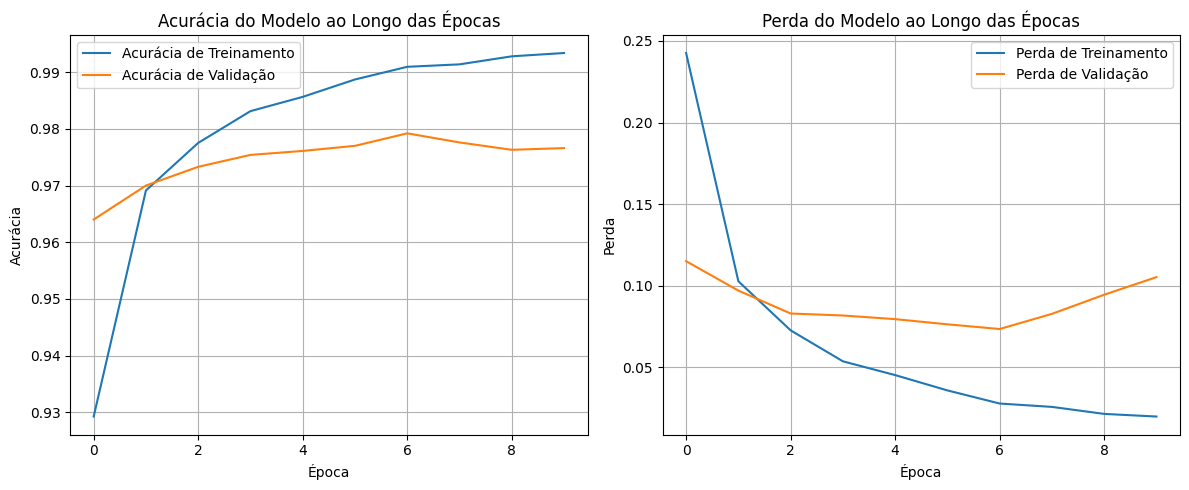

In [ ]:
plt.figure(figsize=(12, 5))

# Gráfico da Acurácia
plt.subplot(1, 2, 1) # 1 linha, 2 colunas, 1º gráfico
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.title('Acurácia do Modelo ao Longo das Épocas')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)

# Gráfico da Perda (Loss)
plt.subplot(1, 2, 2) # 1 linha, 2 colunas, 2º gráfico
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.title('Perda do Modelo ao Longo das Épocas')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### Análise do Gráfico de Acurácia

* `A alta acurácia de validação (próxima de 97-98%)` indica que o modelo é muito bom em classificar dígitos que nunca viu antes, demonstrando uma excelente capacidade de generalização.
* A leve divergência entre as linhas de treinamento e validação nas épocas finais (onde o treinamento melhora, mas a validação não tanto ou piora um pouco) é um sinal de sobreajuste (overfitting) leve. Isso significa que o modelo pode estar começando a memorizar os dados de treinamento em vez de aprender padrões mais gerais que se aplicam a dados novos.

#### Análise do Gráfico de Perda

A queda significativa na perda de validação nas primeiras épocas é um bom sinal de que o modelo está aprendendo e se tornando mais preciso em dados não vistos.
O fato de a perda de treinamento continuar caindo enquanto a perda de validação começa a subir novamente nas últimas épocas é outro forte indicador de sobreajuste (overfitting). O modelo está se tornando excessivamente específico para os dados de treinamento, e isso começa a prejudicar sua capacidade de desempenho em dados novos.

### **Passo 1:** Gerar Previsões

O modelo 'model' já foi treinado nas células anteriores. Aqui, pedimos a ele para fazer previsões
para todas as imagens do conjunto de teste (x_teste).
'previsoes' será um array onde cada linha contém 10 probabilidades (uma para cada dígito de 0 a 9).

In [ ]:
# 'model' é o nome do nosso modelo treinado
previsoes = model.predict(x_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


### **Passo 2: Selecionar Exemplos Aleatórios e Obter Rótulos**

Não queremos ver todas as 10.000 imagens de teste. Vamos selecionar 10 delas aleatoriamente para uma inspeção rápida.

In [ ]:
# Gera 10 índices aleatórios do conjunto de teste (sem repetição).
# Isso garante que pegaremos 10 imagens diferentes.
indices = np.random.choice(len(x_teste), 10, replace=False)

# Usa os índices aleatórios para pegar as 10 imagens correspondentes do 'x_teste'.
imagens = x_teste[indices]

# Pega os rótulos REAIS (corretos) dessas 10 imagens do conjunto 'y_teste'.
# Note que 'y_teste' aqui é o original (inteiro), não o one-hot encoded 'y_teste_cat'.
rotulos_reais = y_teste[indices]

# Para as 'previsoes' geradas no Passo 1, pegamos apenas as previsões para as 10 imagens selecionadas.
# 'np.argmax' é usado para encontrar o índice (que é o dígito previsto) da maior probabilidade.
# Por exemplo, se a previsão for [0.1, 0.0, 0.8, 0.0, ...], argmax retorna 2.
rotulos_previstos = np.argmax(previsoes[indices], axis=1)

### **Passo 3: Configurar e Plotar os Gráficos**

Agora que temos as imagens e seus rótulos reais e previstos, vamos exibi-los em um grid de gráficos.

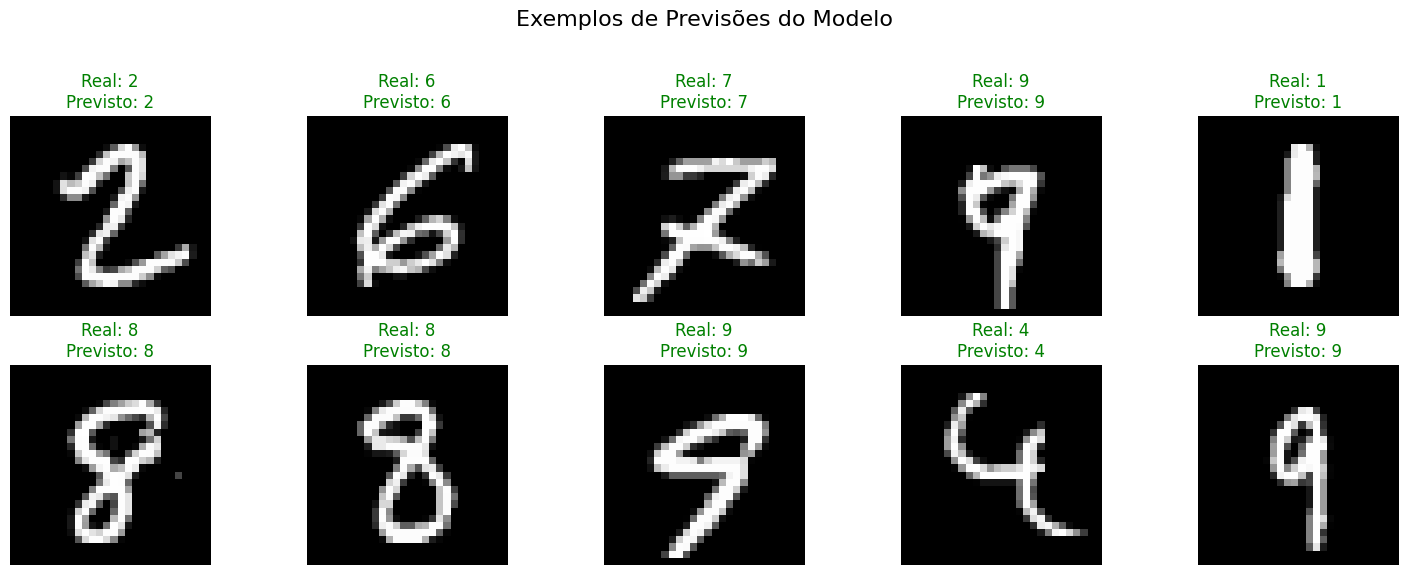

In [ ]:
# Cria uma figura para abrigar todos os 10 sub-gráficos, com um tamanho razoável.
plt.figure(figsize=(15, 6))

# Loop para plotar cada uma das 10 imagens selecionadas.
for i in range(10):
    # Cria um sub-gráfico na posição (i+1) de um grid de 2 linhas e 5 colunas.
    plt.subplot(2, 5, i + 1)

    # Exibe a imagem. Como 'imagens' tem formato (28, 28, 1), reshape(28, 28) remove a dimensão extra.
    # 'cmap='gray'' garante que a imagem seja exibida em escala de cinza.
    plt.imshow(imagens[i].reshape(28, 28), cmap='gray')

    # Define a cor do título do sub-gráfico:
    # Se o rótulo previsto for igual ao rótulo real, a cor é verde (acerto).
    # Caso contrário, a cor é vermelha (erro).
    color = 'green' if rotulos_previstos[i] == rotulos_reais[i] else 'red'

    # Define o título do sub-gráfico com o rótulo real e o rótulo previsto, na cor determinada.
    plt.title(f"Real: {rotulos_reais[i]}\nPrevisto: {rotulos_previstos[i]}", color=color)

    # Remove os eixos (números e marcações) do sub-gráfico para focar na imagem.
    plt.axis('off')

# Adiciona um título principal para toda a figura.
plt.suptitle("Exemplos de Previsões do Modelo", fontsize=16)

# Ajusta o layout para evitar que os títulos e rótulos se sobreponham, especialmente o título principal.
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Exibe a figura com todos os sub-gráficos.
plt.show()

### **Analise de previsões do modelo**

*   Acima mostra **imagens de teste reais** (que o modelo nunca viu durante o treinamento).
*   Exibe o **dígito correto** (o que a imagem *realmente* é).
*   Mostra o **dígito que o modelo *previu***.
*   Usa **cores** para indicar se o modelo **acertou (verde)** ou **errou (vermelho)** a previsão.

É crucial para identificar padrões de erros, ver onde o modelo pode estar com dificuldades e ter uma intuição melhor sobre o seu desempenho, além das métricas numéricas como acurácia.